# Overview of main models

* [x] Pooled Regression 
* [x] First Differences
* [x] Fixed Effects
* [x] Random Effects

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load data

In [3]:
!pip install linearmodels

     ---------------------------------------- 1.9/1.9 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 82.5/82.5 kB ? eta 0:00:00
     ------------------------------------- 988.3/988.3 kB 31.6 MB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
  Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.32
    Uninstalling Cython-0.29.32:
      Successfully uninstalled Cython-0.29.32


In [5]:
import pandas as pd
from linearmodels.datasets import wage_panel

data = wage_panel.load()
year = pd.Categorical(data.year)
data = data.set_index(["nr", "year"])
data["year"] = year
print(wage_panel.DESCR)
print(data.head())


F. Vella and M. Verbeek (1998), "Whose Wages Do Unions Raise? A Dynamic Model
of Unionism and Wage Rate Determination for Young Men," Journal of Applied
Econometrics 13, 163-183.

nr                       person identifier
year                     1980 to 1987
black                    =1 if black
exper                    labor market experience
hisp                     =1 if Hispanic
hours                    annual hours worked
married                  =1 if married
educ                     years of schooling
union                    =1 if in union
lwage                    log(wage)
expersq                  exper^2
occupation               Occupation code

         black  exper  hisp  hours  married  educ  union     lwage  expersq  \
nr year                                                                       
13 1980      0      1     0   2672        0    14      0  1.197540        1   
   1981      0      2     0   2320        0    14      1  1.853060        4   
   1982      0    

## Visualization of unobserved heterogeneities

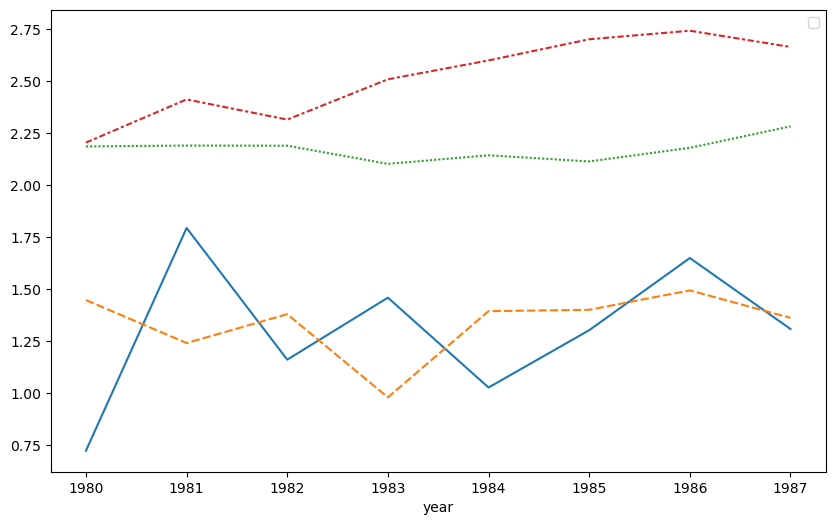

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


data_plot = (data[['lwage']].
             reset_index().
             pivot(index='year', columns='nr', values='lwage').
             sample(n=4, axis=1, random_state=1)
            )

plt.figure(figsize=(10,6))
sns.lineplot(data = data_plot)
plt.legend('')
plt.show()

## Preprocess data
* Define exogenous variables ($X$)
* Add constant

In [33]:
import statsmodels.api as sm

#Exogenous variables with time-invariant covariates
exog_vars = ["black", "hisp", "exper", "expersq", "married", "educ", "union"] #, "year"]
exog = sm.add_constant(data[exog_vars])


#Exogenous variables without time-invariant covariates
exog_vars_notic = ["exper", "expersq", "married", "union"]
exog_notic = data[exog_vars_notic] #notic = No Time-Invariant Covariates

## Evaluate models

### Pooled Regression

In [34]:
from linearmodels.panel import PooledOLS

mod = PooledOLS(data.lwage, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.1866
Estimator:                  PooledOLS   R-squared (Between):              0.2027
No. Observations:                4360   R-squared (Within):               0.1679
Date:                Sun, Jul 09 2023   R-squared (Overall):              0.1866
Time:                        20:18:51   Log-likelihood                   -2989.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      142.61
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(7,4352)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             142.61
                            

### First Differences

In [35]:
from linearmodels.panel import FirstDifferenceOLS

mod = FirstDifferenceOLS(data.lwage, exog_notic)
fd_res = mod.fit()
print(fd_res)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                  lwage   R-squared:                        0.0268
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.5491
No. Observations:                3815   R-squared (Within):               0.1763
Date:                Sun, Jul 09 2023   R-squared (Overall):              0.5328
Time:                        20:18:56   Log-likelihood                   -2305.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      26.208
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(4,3811)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             26.208
                            

### Fixed Effects

In [36]:
from linearmodels.panel import PanelOLS

mod = PanelOLS(data.lwage, exog_notic, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1780
Estimator:                   PanelOLS   R-squared (Between):              0.5496
No. Observations:                4360   R-squared (Within):               0.1780
Date:                Sun, Jul 09 2023   R-squared (Overall):              0.5333
Time:                        20:18:59   Log-likelihood                   -1331.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      206.38
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(4,3811)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             206.38
                            

### Random Effects

In [47]:
from linearmodels.panel import RandomEffects

mod = RandomEffects(data.lwage, exog_notic)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.6153
Estimator:              RandomEffects   R-squared (Between):              0.9056
No. Observations:                4360   R-squared (Within):               0.0052
Date:                Sun, Jul 09 2023   R-squared (Overall):              0.8663
Time:                        20:32:54   Log-likelihood                   -2144.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1741.8
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(4,4356)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             1741.8
                            

## Comparison

In [48]:
from linearmodels.panel import compare

print(compare({"Pooled": pooled_res, "FD": fd_res,"FE": fe_res, "RE": re_res}, 
              precision='std_errors',
              stars=True))

                                       Model Comparison                                       
                                Pooled                     FD             FE                RE
----------------------------------------------------------------------------------------------
Dep. Variable                    lwage                  lwage          lwage             lwage
Estimator                    PooledOLS     FirstDifferenceOLS       PanelOLS     RandomEffects
No. Observations                  4360                   3815           4360              4360
Cov. Est.                   Unadjusted             Unadjusted     Unadjusted        Unadjusted
R-squared                       0.1866                 0.0268         0.1780            0.6153
R-Squared (Within)              0.1679                 0.1763         0.1780            0.0052
R-Squared (Between)             0.2027                 0.5491         0.5496            0.9056
R-Squared (Overall)             0.1866            

## Hypothesis tests

* [x] Breusch-Pagan
* [x] Durbin-Whatson
* [ ] Hausmann
* [ ] Breusch-Godfrey


### Pooled Regression or Random Effects?
Breusch-Pagan LM test.  
Null hypothesis: Pooled Regression

In [49]:
from statsmodels.stats.api import het_breuschpagan
_, p, _, _ = het_breuschpagan(pooled_res.resids, exog)
print(f'p-value = {p}')

p-value = 0.0029816234472134885


### Fixed Effects or First Difference?

Durbin-Whatson test or Breusch-Godgrey test.

__Durbin-Whatson__ should be ~ 2 for Fixed Effects.  
As a rule of thumb, we say anything between 1.5 and 2.5 is close enough to 2 for us to choose a Fixed Effects model.

__Breusch-Godfrey__ has null hypothesis that model is Fixed Effects and alternative hypotehsis that model is First Difference. 

The Durbin-Whatson statistic evaluates if residuals follow an $AR(1)$ process.  
The Breusch-Godfrey test tests if residuals follow an $AR(p)$ process with $p \geq 1$

Let's focus on Durbin-Whatson:

In [50]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(fe_res.resids)

1.9201421214822525

### Fixed Effects or Random Effects?

Hausman test.  
$H_0$: Random Effetcs  
$H_a$: Fixed Effects  

In [51]:
def hausman(fe, re):
    
    import numpy as np
    import numpy.linalg as la
    import scipy.stats as stats
    
    #Get coefficients
    b = fe.params
    B = re.params
    
    #Get covariance matrices
    v_b = fe.cov
    v_B = re.cov
    
    #Calculate chi2 stats and p-value
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    
    return chi2, df, pval

In [58]:
chi2,df, p = hausman(fe_res, re_res)
print(f"Hausman test statistic: {chi2}")
print(f"Degrees of feedom: {df}")
print(f"p-value: {p}")

Hausman test statistic: 1239.3170732172548
Degrees of feedom: 4
p-value: 4.77056282667815e-267


## Bonus: Auto Panel Data Regression

*Not thoroughly tested. Use with caution!!!*

In [74]:
def autoPDR(y, X, alpha = 0.05):
    pooled = PooledOLS(y, X).fit()
    _, p, _, _ = het_breuschpagan(pooled.resids, X)
    
    if p >= alpha:
        print("Use pooled regression")
        print(pooled)
        return(1)
    else:
        del(pooled)
        del(p)
    
    re = RandomEffects(y, X).fit()
    fe = PanelOLS(y, X, entity_effects=True).fit()
    
    chi2,df, p = hausman(fe_res, re_res)
    
    if p >= alpha:
        print("Use Random Effects")
        print(re)
        return(1)
    else:
        del(re)
        del(p)
    
    DW = durbin_watson(fe.resids)
    
    if abs(DW - 2) <= 0.5:
        print("Use Fixed Effects")
        print(fe)
        return(1)
    else:
        del(fe)
        del(p)
    
    fd = FirstDifferenceOLS(y,X).fit()
    print("Try a First Differences model")
    print(fd)

In [73]:
pdr = autoPDR(data.lwage, exog_notic)
pdr

Use Fixed Effects
                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1780
Estimator:                   PanelOLS   R-squared (Between):              0.5496
No. Observations:                4360   R-squared (Within):               0.1780
Date:                Sun, Jul 09 2023   R-squared (Overall):              0.5333
Time:                        20:58:32   Log-likelihood                   -1331.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      206.38
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(4,3811)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             206.38
          

1